<a href="https://colab.research.google.com/github/donna99f/Machine-Learning/blob/main/Gold_Price_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


# **Data collection and processing :**


In [ ]:
gold_data=pd.read_csv('/content/gld_price_data.csv')  #Reading the data file

gold_data.head()  #print fisrt 5 rows

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.tail()  #print last 5 rows

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold_data.isnull().sum() #checking the number of missing values


Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**Correlation :**
1.  positive correlation
2.  negative correlation



<ipython-input-8-8eba4a03bf70>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

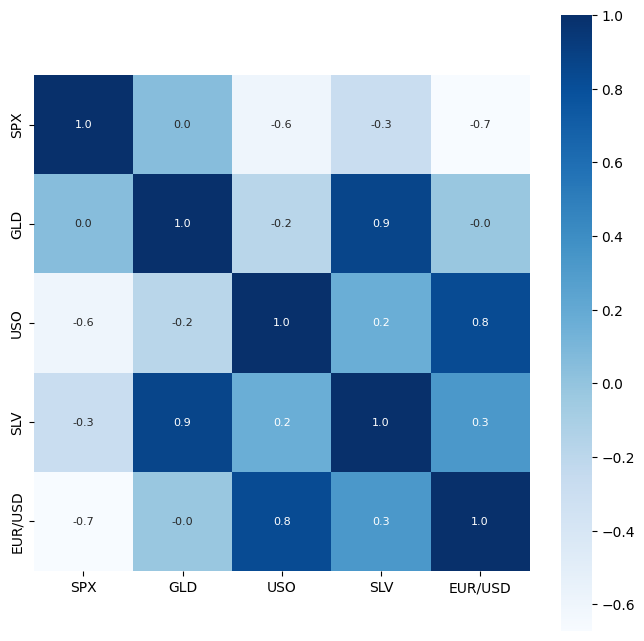

In [ ]:
#constructing the heatmap to understand the correlation
correlation = gold_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True , square=True , fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues' )

In [ ]:
print(correlation['GLD']) #correlation values of gld

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-10-be833402f13c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')  #gold price distribution


<Axes: xlabel='GLD', ylabel='Density'>

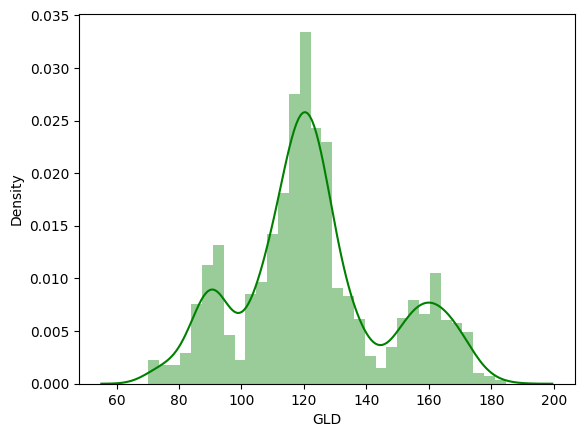

In [ ]:
sns.distplot(gold_data['GLD'],color='green')  #gold price distribution

Splitting Features and the Target :

In [13]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [15]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [16]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [18]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,Y_train)
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.50889956  81.99650023 116.0838     127.73620053 120.82070116
 154.59129787 150.13479856 126.11350031 117.585399   126.05670059
 116.34430122 171.92930084 141.46029882 167.6722991  114.97520056
 117.8508004  138.80090318 169.98020015 160.12800387 156.88999932
 155.13970036 125.20990025 176.47510036 157.05990357 125.2319007
  93.77739972  77.36180046 120.94290025 119.07689939 167.5048993
  88.24010058 125.30979987  91.18260104 117.59970023 121.06909896
 136.30020118 115.57600104 115.18460071 148.45509937 107.34800127
 104.49190269  87.21049789 126.47060103 117.84329894 153.04759907
 119.55450007 108.44259964 108.11359854  93.22280038 127.06059793
  74.60640036 113.74549911 121.37330021 111.38989921 118.881399
 120.82389917 158.89310022 167.34730115 146.79989668  86.00239876
  94.31000048  86.75819922  90.58819985 119.02910062 126.37680054
 127.57060024 169.29689997 122.26819914 117.47579884  98.50210064
 168.24710118 142.76369774 132.28780241 121.07520217 120.62799946
 119.69380076 

In [19]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9895505809277154


The Actual Values and Predicted Values in a Plot

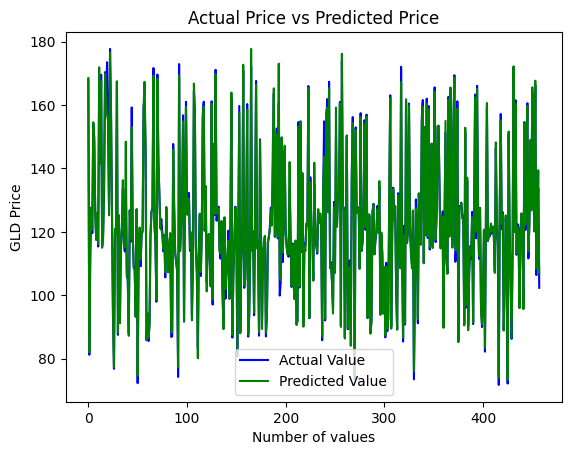

In [20]:
Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()